In [4]:
# First import the packages to use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 100) # This line of code sets the display to show all rows

In [6]:
df = pd.read_csv(r'C:\Users\Proseuche\Desktop\Uche\Data Analysis with Alex\Python Correlation\movies.csv')

In [7]:
# View of data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning

In [12]:
# Search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


---

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
# Filling the missing values with mode

for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [16]:
# Change data types of budget and gross revenue

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [19]:
# Creating a column with data type string from the released column. 

df['released_str'] = df['released'].astype(str)
df['released']


0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [93]:
df['released_str']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released_str, Length: 7668, dtype: object

In [20]:
# Check for missing values
# Search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
released_str - 0.0%


In [21]:
# To extract everything before the delimiter (,) use .str[0]

# Extracting everything after the delimiter (,) use .str[1]

df['released_eject1'] = df['released_str'].str.split(',').str[1]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_str,released_eject1
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",1980 (United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,14000000,Universal Pictures,90.0,"October 23, 2020 (United States)",2020 (United States)
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20000000,14000000,Cactus Blue Entertainment,90.0,"February 7, 2020 (United States)",2020 (United States)
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,14000000,Embi Productions,97.0,"April 27, 2020 (Cameroon)",2020 (Cameroon)
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.6,13000,James Randall,James Randall,Christina Roz,United States,15000,14000000,Universal Pictures,120.0,"October 1, 2020 (United States)",2020 (United States)


In [22]:
# Search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
released_str - 0.0%
released_eject1 - 0.007433489827856025%


In [24]:
# Filling the missing values with mode

for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    #print(df)

In [25]:
# Search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
released_str - 0.0%
released_eject1 - 0.0%


In [26]:
# Extract the correct year from the released_eject1 column

df['year_ext'] = df['released_eject1'].astype(str).str[:5]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_str,released_eject1,year_ext
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",1980 (United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",1980 (United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",1980 (United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",1980 (United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",1980 (United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,14000000,Universal Pictures,90.0,"October 23, 2020 (United States)",2020 (United States),2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20000000,14000000,Cactus Blue Entertainment,90.0,"February 7, 2020 (United States)",2020 (United States),2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,14000000,Embi Productions,97.0,"April 27, 2020 (Cameroon)",2020 (Cameroon),2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.6,13000,James Randall,James Randall,Christina Roz,United States,15000,14000000,Universal Pictures,120.0,"October 1, 2020 (United States)",2020 (United States),2020


In [27]:
# Search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
released_str - 0.0%
released_eject1 - 0.0%
year_ext - 0.0%


In [28]:
# Change the year_ext data type to int64

df['year_ext'] = df['year_ext'].astype('int64')

In [29]:
# Sorting the data frame by 'gross'

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_str,released_eject1,year_ext
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States)",2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)",2019 (United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States)",1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States)",2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)",2018 (United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20000000,1400,British Broadcasting Corporation (BBC),103.0,"February 9, 2001 (United States)",2001 (United States),2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20000000,790,Visual Arts Entertainment,104.0,"January 11, 2019 (United States)",2019 (United States),2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20000000,682,Roxwell Films,93.0,"June 26, 2020 (United States)",2020 (United States),2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,"April 17, 1993 (Japan)",1993 (Japan),1993


In [30]:
# Dropping duplicates
# To drop columns across the entire dataframe use: 
# df.drop_duplicates().sort_values(ascending=False)


df['company'].drop_duplicates().sort_values(ascending=False)



7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

# Deleting unwanted columns

In [31]:
df = df.drop(['released_str', 'released_eject1'], axis = 1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
 15  year_ext  7668 non-null   int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 958.6+ KB


# Visualization

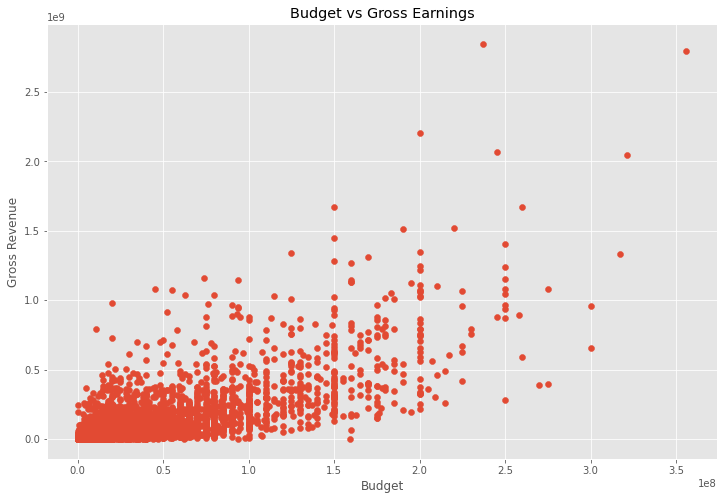

In [34]:
# Scatter Plot

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

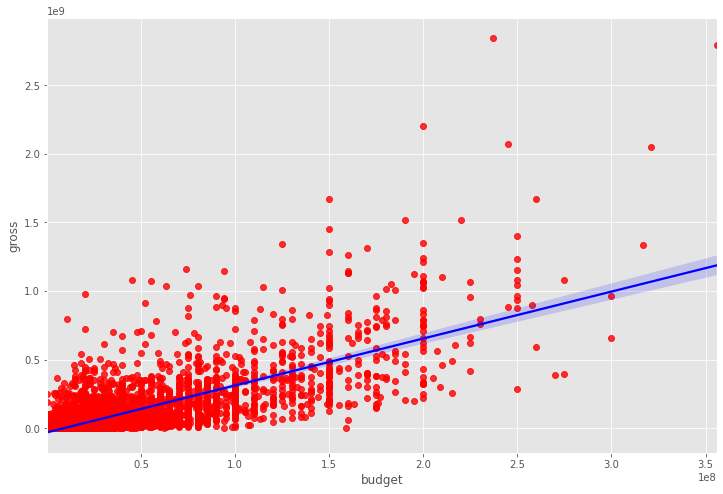

In [35]:
# Plotting budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [36]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [37]:
# Finding the correlation between variables (This correlation only works with numerical variables)
# different correlation methods: pearson, kendall, spearman - each give different correlation matrix

df.corr(method='pearson') 

,year,score,votes,budget,gross,runtime,year_ext
year,1.000000,0.098084,0.222485,0.292360,0.260251,0.120431,0.994577
score,0.098084,1.000000,0.409123,0.061775,0.185799,0.399543,0.107714
votes,0.222485,0.409123,1.000000,0.462013,0.632376,0.309150,0.216795
budget,0.292360,0.061775,0.462013,1.000000,0.746670,0.273507,0.284475
gross,0.260251,0.185799,0.632376,0.746670,1.000000,0.244711,0.252863
runtime,0.120431,0.399543,0.309150,0.273507,0.244711,1.000000,0.120444
year_ext,0.994577,0.107714,0.216795,0.284475,0.252863,0.120444,1.000000


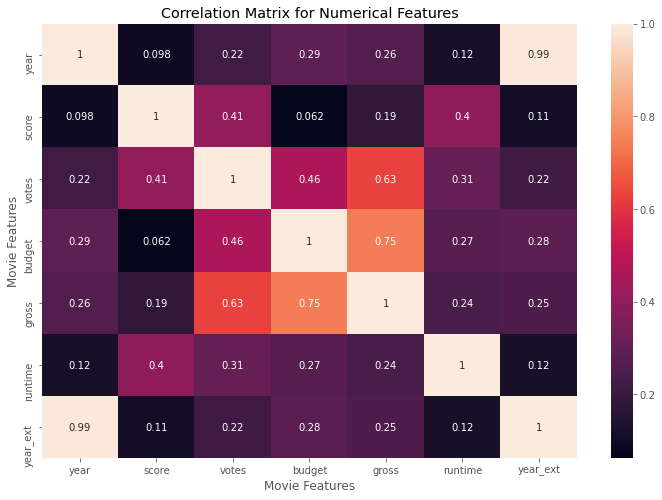

In [38]:
cor_matrix = df.corr(method='pearson') 

sns.heatmap(cor_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [121]:
# Trying to find non-numeric correlation. E.g company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_str,released_eject1,year_ext
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",1980 (United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",1980 (United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",1980 (United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",1980 (United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",1980 (United States),1980


The code below *numerizes* the non-numerical columns

In [39]:
temp = df

df_numerized = temp

In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_ext
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [43]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_ext
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [46]:
# Denumerizes the columns with nominal values

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_ext
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200,730,1123,2319,54,20000000,1400,477,103.0,2001
7625,6720,6,4,2019,1149,5.7,320,2546,2565,1915,55,20000000,790,2308,104.0,2019
7580,4664,3,5,2019,1835,5.2,735,1445,2203,2278,55,20000000,682,1992,93.0,2020
2417,3406,6,6,1993,85,7.3,5100,33,1718,2563,27,11900000,596,796,134.0,1993


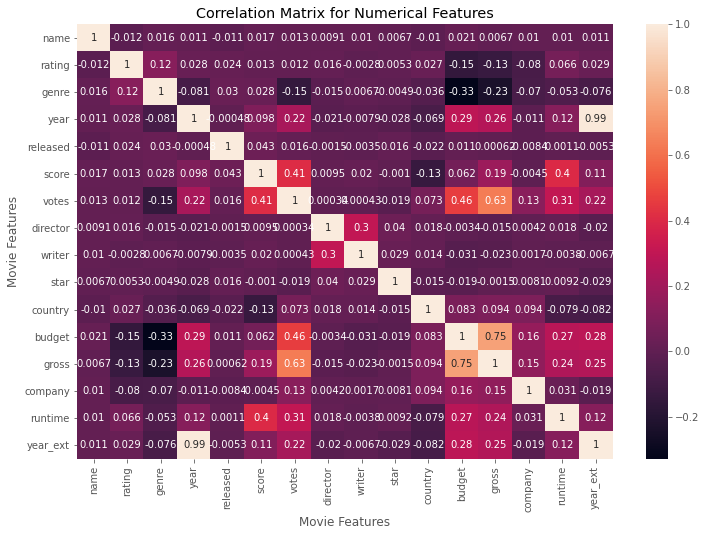

In [47]:
# Correlation plot for all variables

cor_matrix_numerized = df_numerized.corr(method='pearson') 

sns.heatmap(cor_matrix_numerized, annot=True)

plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [51]:
# Shows are the correlation in a matrix

cor_matrix_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_ext
name,1.000000,-0.096887,0.006655,-0.117403,-0.103535,-0.105648,-0.161058,-0.075707,-0.071095,-0.060168,-0.090973,-0.111950,-0.139828,-0.075629,-0.131697,-0.116180
rating,-0.096887,1.000000,0.280826,-0.122743,-0.016320,-0.099986,-0.273865,-0.048870,-0.071684,-0.050109,-0.050825,-0.445873,-0.434242,-0.296256,-0.081571,-0.118165
genre,0.006655,0.280826,1.000000,-0.310149,0.045577,-0.102877,-0.529271,-0.030945,0.011072,-0.005294,-0.119942,-0.713805,-0.642767,-0.254107,-0.283355,-0.301504
year,-0.117403,-0.122743,-0.310149,1.000000,-0.146800,0.087787,0.302630,-0.230878,-0.208645,-0.209023,-0.258901,0.420728,0.370714,-0.132117,0.140463,0.999852
released,-0.103535,-0.016320,0.045577,-0.146800,1.000000,-0.056339,-0.162285,-0.098879,-0.099451,-0.039575,-0.117202,-0.145409,-0.163446,-0.120870,-0.141043,-0.148304
score,-0.105648,-0.099986,-0.102877,0.087787,-0.056339,1.000000,0.541261,-0.160404,-0.146398,-0.148073,-0.380617,0.143044,0.266189,-0.118263,0.630189,0.095923
votes,-0.161058,-0.273865,-0.529271,0.302630,-0.162285,0.541261,1.000000,-0.250063,-0.258892,-0.237081,-0.042679,0.746866,0.858897,0.140233,0.515387,0.297945
director,-0.075707,-0.048870,-0.030945,-0.230878,-0.098879,-0.160404,-0.250063,1.000000,0.500156,0.006289,-0.040354,-0.210433,-0.238980,-0.111198,-0.173900,-0.228405
writer,-0.071095,-0.071684,0.011072,-0.208645,-0.099451,-0.146398,-0.258892,0.500156,1.000000,-0.011428,-0.050230,-0.248187,-0.259731,-0.119735,-0.208171,-0.205356
star,-0.060168,-0.050109,-0.005294,-0.209023,-0.039575,-0.148073,-0.237081,0.006289,-0.011428,1.000000,-0.088738,-0.191531,-0.192163,-0.081124,-0.151764,-0.207807


In [58]:
# Unstacks the matrix

correlation_matrix = cor_matrix_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.096887
          genre       0.006655
          year       -0.117403
          released   -0.103535
          score      -0.105648
          votes      -0.161058
          director   -0.075707
          writer     -0.071095
          star       -0.060168
          country    -0.090973
          budget     -0.111950
          gross      -0.139828
          company    -0.075629
          runtime    -0.131697
          year_ext   -0.116180
rating    name       -0.096887
          rating      1.000000
          genre       0.280826
          year       -0.122743
          released   -0.016320
          score      -0.099986
          votes      -0.273865
          director   -0.048870
          writer     -0.071684
          star       -0.050109
          country    -0.050825
          budget     -0.445873
          gross      -0.434242
          company    -0.296256
          runtime    -0.081571
          year_ext   -0.118165
genre   

In [60]:
# Sorts the pairs

sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

name      name        1.000000
rating    rating      1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
year_ext  year_ext    1.000000
year      year_ext    0.999852
year_ext  year        0.999852
budget    gross       0.945796
gross     budget      0.945796
votes     gross       0.858897
gross     votes       0.858897
votes     budget      0.746866
budget    votes       0.746866
score     runtime     0.630189
runtime   score       0.630189
votes     score       0.541261
score     votes       0.541261
runtime   votes       0.515387
votes     runtime     0.515387
director  writer      0.500156
writer    director    0.500156
budget  

In [61]:
# Finds the highest correlated pairs

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

name      name        1.000000
rating    rating      1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
year_ext  year_ext    1.000000
year      year_ext    0.999852
year_ext  year        0.999852
budget    gross       0.945796
gross     budget      0.945796
votes     gross       0.858897
gross     votes       0.858897
votes     budget      0.746866
budget    votes       0.746866
score     runtime     0.630189
runtime   score       0.630189
votes     score       0.541261
score     votes       0.541261
runtime   votes       0.515387
votes     runtime     0.515387
director  writer      0.500156
writer    director    0.500156
dtype: f

# Findings

1. Budget and Gross earnings show a high correlation

2. Votes and Gross also show a high correlation. This could mean the more a movie makes the higher the votes it gets.

3. Votes and Budget likewise show a positive correlation.

4. Runtime and score is shows a positive correlation.

5. Runtime and Votes also show a positive correlation. But could this mean the longer the movie, the more votes it gets?

6. Director and writer shows a moderate positive correlation. The only hypothesis I have to this correlation is, for some movies, the director doubles as the writter which I think is pretty superb.